In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('sonardataset.csv')

In [3]:
df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.shape

(208, 61)

In [5]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
X=df.drop('Y',axis=1)

In [7]:
y=df['Y']

In [8]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [9]:
scale=StandardScaler()
le=LabelEncoder()

In [10]:
X_scaled=scale.fit_transform(X)

In [11]:
y_scaled=le.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=42)

In [14]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((166, 60), (166,), (42, 60), (42,))

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=5,verbose=1,restore_best_weights=True)

In [16]:
model=Sequential()
model.add(Dense(64,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(32,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
    
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [17]:
history=model.fit(X_train,y_train,batch_size=32,epochs=50,verbose=1,callbacks=early_stop,validation_split=0.2)

Epoch 1/50


5/5 [==============================] - 1s 44ms/step - loss: 0.6739 - accuracy: 0.5909 - val_loss: 0.6422 - val_accuracy: 0.7059
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 0.6272 - accuracy: 0.7045 - val_loss: 0.6313 - val_accuracy: 0.7647
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.5948 - accuracy: 0.7424 - val_loss: 0.6159 - val_accuracy: 0.8235
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 0.5660 - accuracy: 0.8106 - val_loss: 0.5989 - val_accuracy: 0.8235
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 0.5358 - accuracy: 0.8409 - val_loss: 0.5808 - val_accuracy: 0.7941
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.5041 - accuracy: 0.8561 - val_loss: 0.5594 - val_accuracy: 0.7941
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 0.4692 - accuracy: 0.8712 - val_loss: 0.5354 - val_accuracy: 0.7647
Epoch 8/50
5/5 [===============

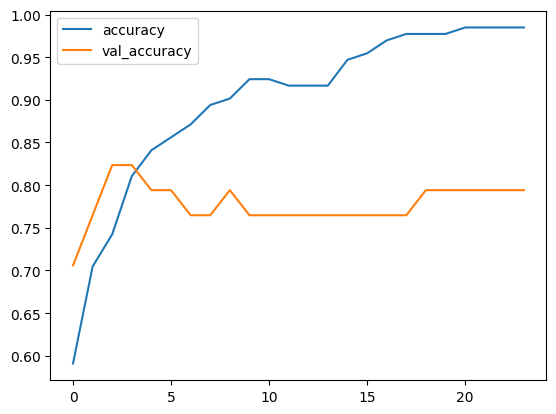

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.show()

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
y_pred=model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [21]:
new_ypred = []

for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        new_ypred.append(1)
    else:
        new_ypred.append(0)


In [22]:
round(accuracy_score(y_test,new_ypred),2)

0.81

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,new_ypred))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83        26
           1       0.68      0.94      0.79        16

    accuracy                           0.81        42
   macro avg       0.82      0.83      0.81        42
weighted avg       0.85      0.81      0.81        42



# HyperParameter Tunning using Keras Tuner

In [25]:
import keras_tuner as kt 
def build_model(hp):
    model=Sequential()
    model.add(Dense(units=hp.Int('units1', 16, 64),activation='relu',input_shape=(X_train.shape[1],)))
    model.add(Dense(units=hp.Int('units2',8,32),activation='relu'))
    model.add(Dense(units=hp.Int('units3',4,12),activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

    return model

In [26]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5)

Reloading Tuner from .\untitled_project\tuner0.json


In [27]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

In [28]:
hp=tuner.get_best_hyperparameters()[0]

In [29]:
print("Best units in layer1:", hp.get('units1'))
print("Best units in layer2:", hp.get('units2'))
print("Best units in layer3:", hp.get('units3'))

Best units in layer1: 61
Best units in layer2: 32
Best units in layer3: 7


# Training model on Best units

In [30]:
new_model=Sequential()
new_model.add(Dense(61,activation='relu',input_shape=(X_train.shape[1],)))
new_model.add(Dense(32,activation='relu'))
new_model.add(Dense(7,activation='relu'))
new_model.add(Dense(1,activation='sigmoid'))
    
new_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [31]:
new_history=new_model.fit(X_train,y_train,batch_size=32,epochs=50,verbose=1,callbacks=early_stop,validation_split=0.2)

Epoch 1/50
5/5 [==============================] - 1s 38ms/step - loss: 0.6659 - accuracy: 0.5303 - val_loss: 0.6474 - val_accuracy: 0.7647
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6320 - accuracy: 0.6591 - val_loss: 0.6383 - val_accuracy: 0.8235
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6084 - accuracy: 0.7121 - val_loss: 0.6268 - val_accuracy: 0.8235
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 0.5904 - accuracy: 0.7879 - val_loss: 0.6147 - val_accuracy: 0.8529
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 0.5714 - accuracy: 0.7955 - val_loss: 0.5987 - val_accuracy: 0.8529
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 0.5529 - accuracy: 0.8106 - val_loss: 0.5841 - val_accuracy: 0.8235
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 0.5354 - accuracy: 0.8106 - val_loss: 0.5741 - val_accuracy: 0.8529
Epoch 8/50
5/5 [=================

In [32]:
new_model_ypred=new_model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [33]:
new_model_ypred_converted=[]

for i in range(len(new_model_ypred)):
    if new_model_ypred[i]>=0.5:
        new_model_ypred_converted.append(1)
    else:
        new_model_ypred_converted.append(0)
    

In [34]:
round(accuracy_score(y_test,new_model_ypred_converted),3)

0.762

In [35]:
print(classification_report(y_test,new_model_ypred_converted))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        26
           1       0.64      0.88      0.74        16

    accuracy                           0.76        42
   macro avg       0.77      0.78      0.76        42
weighted avg       0.80      0.76      0.77        42

